In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
dataset.describe()  # this will give us a statistical summary of the dataset so that we can know which column can have outliers

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,583.000000,596.000000,598.000000,576.000000,577.000000,548.000000
mean,0.754717,5291.788591,1631.499866,144.895833,342.218371,0.843066
std,1.005077,5816.968137,2953.315785,82.757474,64.319629,0.364071
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2875.750000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3787.500000,1211.500000,126.500000,360.000000,1.000000
75%,1.500000,5746.000000,2324.000000,166.250000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


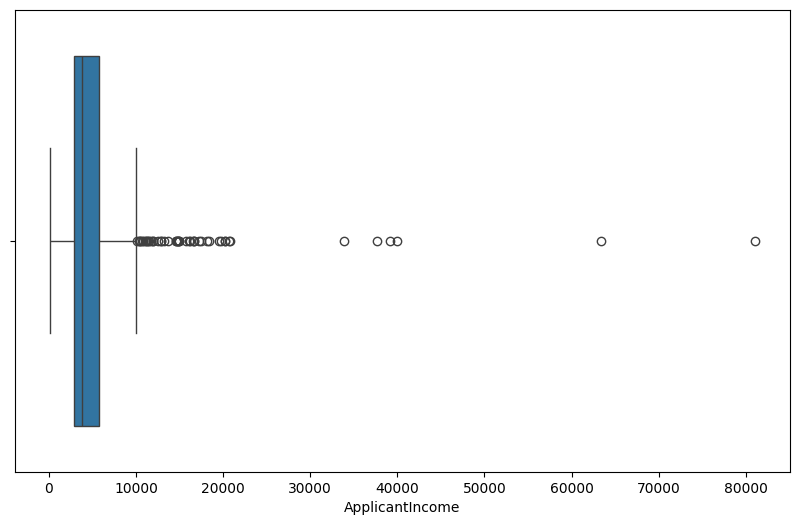

In [15]:
plt.figure(figsize=(10, 6))  # this will set the size of the plot
sns.boxplot(x="ApplicantIncome", data=dataset)  # this will give us a box plot of the CoapplicantIncome column to visualize the distribution and identify potential outliers
# x = "CoapplicantIncome" means we are plotting the CoapplicantIncome column on the x-axis
# data=dataset means we are using the dataset variable as the source of data for the plot
plt.show()  # this will display the plot

In [6]:
dataset.shape # this will give us the number of rows and columns in the dataset

(598, 13)

Finding the quartiles and interquartile range then finding the min_range and the max_range before removing the outlier

In [ ]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)  # this will give us the first quartile of the CoapplicantIncome column
q3 = dataset["CoapplicantIncome"].quantile(0.75)  # this will give us the third quartile of the CoapplicantIncome column
iqr = q3 - q1  # this will give us the interquartile range

np.float64(2324.0)

In [11]:
min_range = q1 - 1.5 * iqr  # this will give us the minimum range for the CoapplicantIncome column
max_range = q3 + 1.5 * iqr  # this will give us the maximum range for the CoapplicantIncome column
print(f"Minimum range: {min_range}, Maximum range: {max_range}") 

Minimum range: -3486.0, Maximum range: 5810.0


Now the main code to remove the outlier

In [16]:
new_dataset = dataset[dataset["CoapplicantIncome"] <= max_range]  # this will filter the dataset to remove outliers in the CoapplicantIncome column which are above the maximum range and show us only the rows that are within the range

In [17]:
new_dataset.shape # this will give us the number of rows and columns in the new dataset after removing outliers

(580, 13)

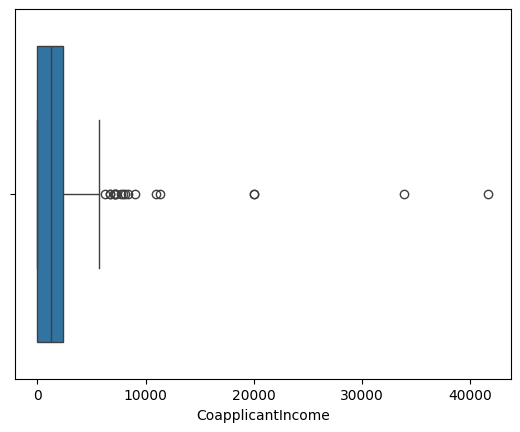

In [18]:
sns.boxplot(
    x="CoapplicantIncome", data=dataset
)  # to visualize the distribution of loan amounts and identify potential outliers
plt.show()  # this will display the plot of the original dataset with outliers